# Проект по анализу данных и машинному обучению на базе данных Аustin Animal Center


####                                                                                                                             Елизавета Соколенко, Дарья Жарикова и Майя Короткая

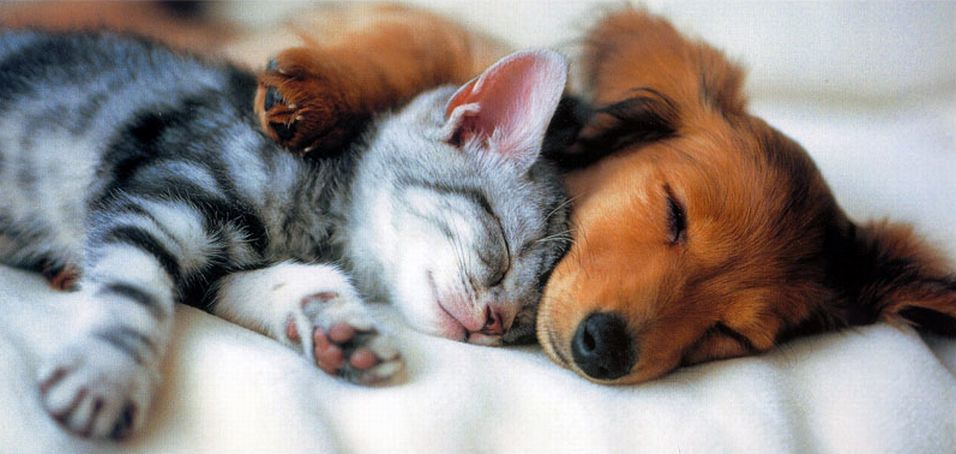

In [256]:
from IPython.display import Image
Image(filename='original.jpg', width=700)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import copy
import seaborn as sns

# Внешний вид базы данных

In [3]:
columns = ['Animal ID','Name','DateTime','MonthYear','Date of Birth',
           'Outcome Type','Outcome Subtype','Animal Type',
           'Sex upon Outcome','Age upon Outcome','Breed','Color']

Animal ID - уникальный номер животного от центра Остин                                         

                                                                                                                                                                                            
Name - имя животного                                                                           

                                                                                               
DateTime и MonthYear - точное время, когда животное было помещено в центр                     

 
Date of Birth - день рождения животного                                                       

 
Outcome Type - в каком статусе животное покинуло центр (возвращено хозяину, нашло новый дом и проч.) 

                                                                                         
Outcome Subtype - в каком статусе животное покинуло центр (причина смерти, передержка и проч.)  


Animal Type - тип животного (кошка, собака, птица, дикое животное, скот)                        


Sex upon Outcome - пол животного и было ли оно кастрировано/стерилизовано                     

 
Age upon Outcome - в каком возрасте животное покинуло центр                                   

 
Breed - порода (в том числе помесь)                                                            


Color - цвет животного

In [4]:
data = pd.read_table('Austin_Animal_Center_Outcomes.csv', sep=',')
data.columns = columns
data.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A779576,*Rajah,10/01/2018 05:03:00 PM,10/01/2018 05:03:00 PM,04/18/2018,Adoption,NaN,Cat,Neutered Male,5 months,Domestic Shorthair Mix,Brown Tabby
1,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico
2,A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan
3,A721285,NaN,02/24/2016 02:42:00 PM,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray
4,A746650,Rose,04/07/2017 11:58:00 AM,04/07/2017 11:58:00 AM,04/06/2016,Return to Owner,NaN,Dog,Intact Female,1 year,Labrador Retriever/Jack Russell Terrier,Yellow


# Подготовка данных и визуализация

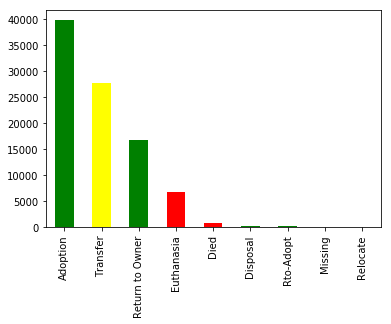

In [275]:
data['Outcome Type'].value_counts().plot.bar(color = ['green', 'yellow','green','r','r','green','g'])

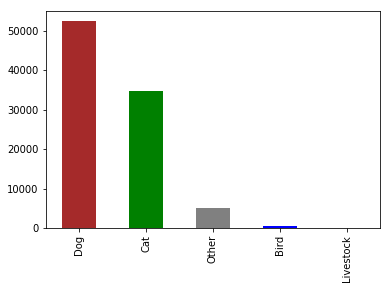

In [277]:
data['Animal Type'].value_counts().plot.bar(color = ['brown', 'green', 'gray', 'blue'])

In [6]:
def my_dummies(series):
    result = pd.get_dummies(series)
    result = pd.DataFrame(result.values, columns=[series.name+':'+str(x) for x in result.columns], index=result.index)
    res_cols = {series.name: [str(x) for x in result.columns]}
    return result, res_cols

In [7]:
cat_vars = ['Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome']

In [8]:
result = []
vars_dict = {}
for x in cat_vars:
    result.append(my_dummies(data[x])[0])
    
    vars_dict[x] = my_dummies(data[x])[1].values()
result = pd.concat(result, axis=1)
result.head()

,Outcome Type:Adoption,Outcome Type:Died,Outcome Type:Disposal,Outcome Type:Euthanasia,Outcome Type:Missing,Outcome Type:Relocate,Outcome Type:Return to Owner,Outcome Type:Rto-Adopt,Outcome Type:Transfer,Outcome Subtype:Aggressive,...,Animal Type:Bird,Animal Type:Cat,Animal Type:Dog,Animal Type:Livestock,Animal Type:Other,Sex upon Outcome:Intact Female,Sex upon Outcome:Intact Male,Sex upon Outcome:Neutered Male,Sex upon Outcome:Spayed Female,Sex upon Outcome:Unknown
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [278]:
def plot_by_group(x_,y):
    x = list(vars_dict[x_])[0]
    my_data = result[x+[y]]
    tmp = my_data.groupby(y).agg('sum')/my_data.groupby(y).agg('sum').sum(axis=0)
    tmp.T.plot.bar(color = ['red', 'green'])

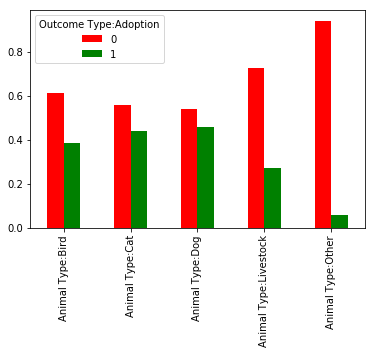

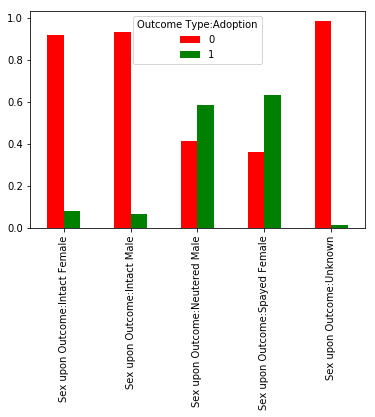

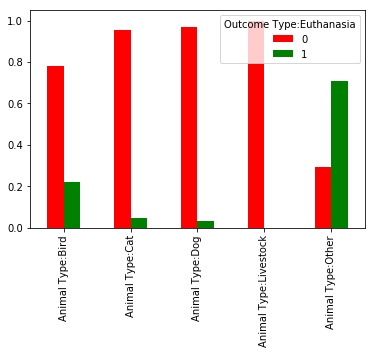

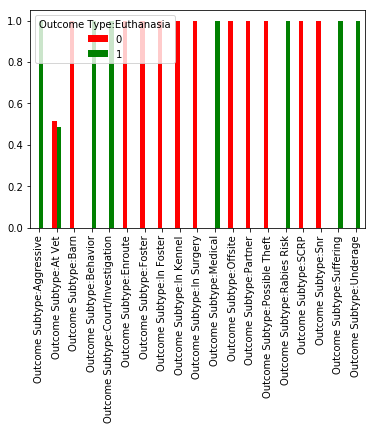

In [279]:
plot_by_group('Animal Type', 'Outcome Type:Adoption')
plot_by_group('Sex upon Outcome', 'Outcome Type:Adoption')
plot_by_group('Animal Type', 'Outcome Type:Euthanasia')
plot_by_group('Outcome Subtype', 'Outcome Type:Euthanasia')

In [35]:
res = pd.get_dummies(data['Animal Type'])
res = pd.concat([res, data], axis=1)
res.drop('Animal Type', axis=1, inplace=True)

res1 = pd.get_dummies(res['Sex upon Outcome'])
res1 = pd.concat([res1, res], axis=1)
res1.drop('Sex upon Outcome', axis=1, inplace=True)

res_one_hot_subtype = pd.get_dummies(res1['Outcome Subtype'])
res_one_hot_subtype = pd.concat([res_one_hot_subtype, res1], axis=1)
res_one_hot_subtype.drop('Outcome Subtype', axis=1, inplace=True)

In [36]:
res_one_hot_subtype.head()

,Aggressive,At Vet,Barn,Behavior,Court/Investigation,Enroute,Foster,In Foster,In Kennel,In Surgery,...,Other,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Age upon Outcome,Breed,Color
0,0,0,0,0,0,0,0,0,0,0,...,0,A779576,*Rajah,10/01/2018 05:03:00 PM,10/01/2018 05:03:00 PM,04/18/2018,Adoption,5 months,Domestic Shorthair Mix,Brown Tabby
1,0,0,0,0,0,0,0,0,0,0,...,0,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,Adoption,10 months,Domestic Shorthair Mix,Calico
2,0,0,0,0,0,0,0,0,0,0,...,0,A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,5 years,Border Terrier Mix,Tan
3,0,0,0,0,0,0,0,0,0,0,...,1,A721285,NaN,02/24/2016 02:42:00 PM,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,2 years,Raccoon Mix,Black/Gray
4,0,0,0,0,0,0,0,0,0,0,...,0,A746650,Rose,04/07/2017 11:58:00 AM,04/07/2017 11:58:00 AM,04/06/2016,Return to Owner,1 year,Labrador Retriever/Jack Russell Terrier,Yellow


### Приведение возраста к единому виду (число в месяцах)

In [37]:
import re

In [38]:
def transformation(x):
    x1 = 0
    if type(x) == float or type(x) == int:
        x1 = x
    if type(x) == str:
        if ' month' in x:
            result = re.findall(r'.*\s', x)
            x1 = int(result[0])
        if ' year' in x:
            result = re.findall(r'.*\s', x)
            x1 = int(result[0])*12
        if ' week' in x:
            result = re.findall(r'.*\s', x)
            x1 = int(result[0])/4
    return x1

In [39]:
transformation('10 week')

2.5

In [40]:
res_age = copy.copy(res_one_hot_subtype)
res_age['Age upon Outcome'] = (
    res_one_hot_subtype['Age upon Outcome'].apply(lambda x: transformation(x)))
res = res_age

### Нам интересно, что приводит к Adoption и Euthanasia

In [41]:
def categories(x):
    if x == 'Adoption' or x == 'Euthanasia':
        x1 = x
    else:
        x1 = 'Other'
    return x1

In [43]:
res['Outcome Type'] = res['Outcome Type'].apply(lambda x: categories(x))
res.head()

,Aggressive,At Vet,Barn,Behavior,Court/Investigation,Enroute,Foster,In Foster,In Kennel,In Surgery,...,Other,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Age upon Outcome,Breed,Color
0,0,0,0,0,0,0,0,0,0,0,...,0,A779576,*Rajah,10/01/2018 05:03:00 PM,10/01/2018 05:03:00 PM,04/18/2018,Adoption,5.0,Domestic Shorthair Mix,Brown Tabby
1,0,0,0,0,0,0,0,0,0,0,...,0,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,Adoption,10.0,Domestic Shorthair Mix,Calico
2,0,0,0,0,0,0,0,0,0,0,...,0,A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,Other,60.0,Border Terrier Mix,Tan
3,0,0,0,0,0,0,0,0,0,0,...,1,A721285,NaN,02/24/2016 02:42:00 PM,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,24.0,Raccoon Mix,Black/Gray
4,0,0,0,0,0,0,0,0,0,0,...,0,A746650,Rose,04/07/2017 11:58:00 AM,04/07/2017 11:58:00 AM,04/06/2016,Other,12.0,Labrador Retriever/Jack Russell Terrier,Yellow


### Избавимся от данных, которые нам ничего не дают

In [44]:
table = res.drop(columns=['Name', 'DateTime', 'MonthYear',
                          'Date of Birth', 'Animal ID', 
                          'Color', 'Breed'])
table.head()

,Aggressive,At Vet,Barn,Behavior,Court/Investigation,Enroute,Foster,In Foster,In Kennel,In Surgery,...,Neutered Male,Spayed Female,Unknown,Bird,Cat,Dog,Livestock,Other,Outcome Type,Age upon Outcome
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,Adoption,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,Adoption,10.0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,Other,60.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,Euthanasia,24.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,Other,12.0


In [45]:
table1 = pd.get_dummies(table['Outcome Type'])
table1 = pd.concat([table1, table], axis=1)
table1.drop('Outcome Type', axis=1, inplace=True)
table1.columns

Index(['Adoption', 'Euthanasia', 'Other', 'Aggressive', 'At Vet', 'Barn',
       'Behavior', 'Court/Investigation', 'Enroute', 'Foster', 'In Foster',
       'In Kennel', 'In Surgery', 'Medical', 'Offsite', 'Partner',
       'Possible Theft', 'Rabies Risk', 'SCRP', 'Snr', 'Suffering', 'Underage',
       'Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female',
       'Unknown', 'Bird', 'Cat', 'Dog', 'Livestock', 'Other',
       'Age upon Outcome'],
      dtype='object')

In [46]:
table1.head()

,Adoption,Euthanasia,Other,Aggressive,At Vet,Barn,Behavior,Court/Investigation,Enroute,Foster,...,Intact Male,Neutered Male,Spayed Female,Unknown,Bird,Cat,Dog,Livestock,Other,Age upon Outcome
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,5.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,10.0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,60.0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,24.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,12.0


### Как эвтаназия связана с Outcome Subtype

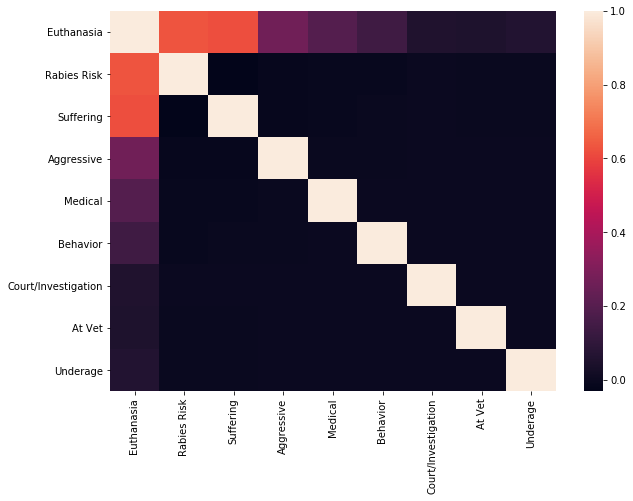

In [61]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(table1[['Euthanasia', 'Rabies Risk','Suffering', 'Aggressive','Medical', 'Behavior', 'Court/Investigation', 'At Vet', 'Underage']].corr(), ax=ax)

### Как пол влияет на Adoption

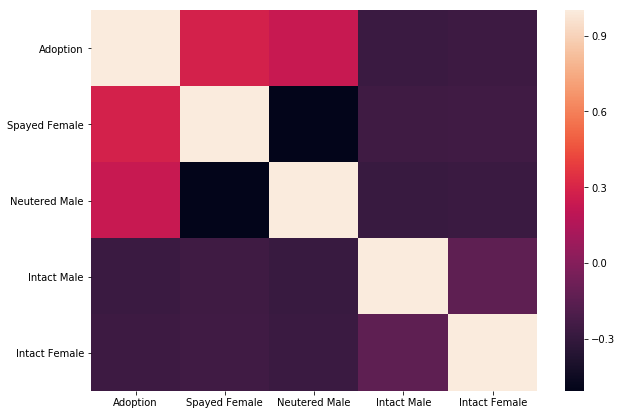

In [247]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(table1[['Adoption', 'Spayed Female','Neutered Male', 'Intact Male','Intact Female']].corr(), ax=ax)

In [214]:
table2 = table1.drop(columns=['Euthanasia', 'Other'])

In [116]:
table2.head()

,Adoption,Aggressive,At Vet,Barn,Behavior,Court/Investigation,Enroute,Foster,In Foster,In Kennel,...,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown,Bird,Cat,Dog,Livestock,Age upon Outcome
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,5.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,10.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,60.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,24.0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,12.0


### Разные модели и обучение

#### Наша цель - Adoption

In [51]:
target = ['Adoption']
non_target = list(set(table2.columns) - set(target))

In [69]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [53]:
y = table2[target]
X = table2[non_target]

In [54]:
X['Age upon Outcome'][X['Age upon Outcome'].isna()] = 0

/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exe

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
                            X, y, test_size=0.33, random_state=41)

In [56]:
y_train.values

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=uint8)

### Логистическая регрессия

In [57]:
lr = LogisticRegression(max_iter=500)
lr.fit(X=X_train, y=y_train.values.ravel())
lr.score(X_test, y_test.values.ravel())

/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8672375473918159

### Линейная регрессия

In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X=X_train, y=y_train.values.ravel())
lin_reg.score(X_test, y_test.values.ravel())

0.5718360656909556

### Дерево решений

In [230]:
import math 

def age(x): 
    x1 = 0 
    if math.isnan(x): 
        x1 = 0 
    else: 
        x1 = x 
    return x1

In [231]:
table2['Age upon Outcome'] = (
    table2['Age upon Outcome'].apply(lambda x: age(x)))
table2.head()

/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Adoption,Aggressive,At Vet,Barn,Behavior,Court/Investigation,Enroute,Foster,In Foster,In Kennel,...,Intact Female,Intact Male,Neutered Male,Spayed Female,Unknown,Bird,Cat,Dog,Livestock,Age upon Outcome
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,5.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,10.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,60.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,24.0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,12.0


In [232]:
columns = table2.columns
X = table2[columns[1:]]
Y = table2[columns[0]]

In [242]:
tree = DecisionTreeClassifier(max_depth = 10)

In [243]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [244]:
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [245]:
tree.score(X_test, Y_test)

0.866344536002416

In [246]:
for i in [2,5,10,20,30,40]:
    tree = DecisionTreeClassifier(max_depth = i, min_samples_split=50, min_samples_leaf=10)
    tree.fit(X_train, Y_train)
    print(str(i)+'  '+str(tree.score(X_test, Y_test)))

2  0.7300142370248932
5  0.8179386513654601
10  0.8654816860088873
20  0.8708313559687648
30  0.8708744984684412
40  0.8708313559687648


### Дерево решений с кросс-валидацией

In [238]:
from sklearn.model_selection import GridSearchCV

In [239]:
parameters = {'max_depth': range(4,30),
             'min_samples_split' : [10,20,40,100]}

In [240]:
clf = GridSearchCV(tree, parameters)
clf.fit(X=X_train, y=Y_train)

/Users/mayakorotkaya/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(4, 30), 'min_samples_split': [10, 20, 40, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [241]:
print (clf.best_score_, clf.best_params_) 

0.8701661034011648 {'max_depth': 14, 'min_samples_split': 20}


### Auc-roc

In [63]:
from sklearn.metrics import accuracy_score, roc_curve, auc, \
                            precision_recall_curve, roc_auc_score, precision_score, recall_score
from sklearn import svm

In [64]:
distance_test = lr.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, distance_test)
precision, recall, _ = precision_recall_curve(y_test, distance_test)

In [65]:
y_pred = lr.predict(X_test)
precision_score(y_test, y_pred)

0.7983231807165783

In [66]:
recall_score(y_test, y_pred, average='macro')

0.8743330958290936

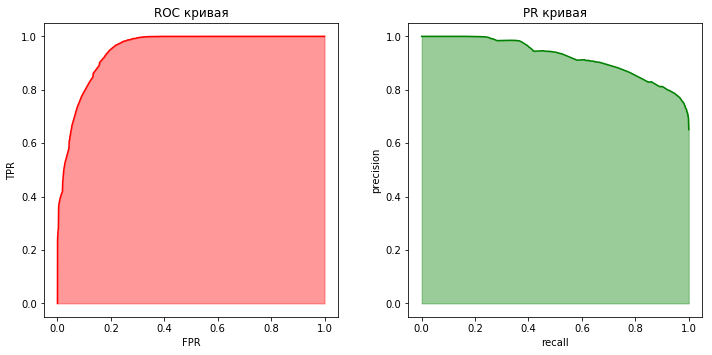

In [283]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)


# ROC кривая
fig.add_subplot(121)
plt.plot(fpr, tpr, c = 'red')
plt.fill_between(fpr, tpr, alpha=0.4, color='red')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('ROC кривая')
plt.xlabel('FPR')
plt.ylabel('TPR')

# RC кривая
fig.add_subplot(122)
plt.plot(recall, precision, c='g')
plt.fill_between(recall, precision, color='g', alpha=0.4)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('PR кривая')
plt.xlabel('recall')
plt.ylabel('precision')
plt.tight_layout(w_pad=3)
plt.show()

# Выводы

1) Линейная регрессия не годится для наших данных, так как мы предсказываем только попадает ли животное в новый дом или нет (1 или 0)

2) Логистическая регрессия хорошо подходит для наших данных (86% точности), так как, видимо, зависимости для всех классов примерно одинаковые (то есть нет такого, что кошек берут скорее в юном возрасте, а собак скорее в зрелом; Хотя могло ожидаться, что скот берут если он не кастрирован/стрерилизован, а всех остальных - наоборот. Возможно, процент скота от всех животных в базе данных просто слишком маленький)

3) Дерево решений (даже с кросс-валидацией) несильно улучшило наш результат (из-за специфики данных; в основном в центр попадают собаки и кошки, а для них все одинаково)

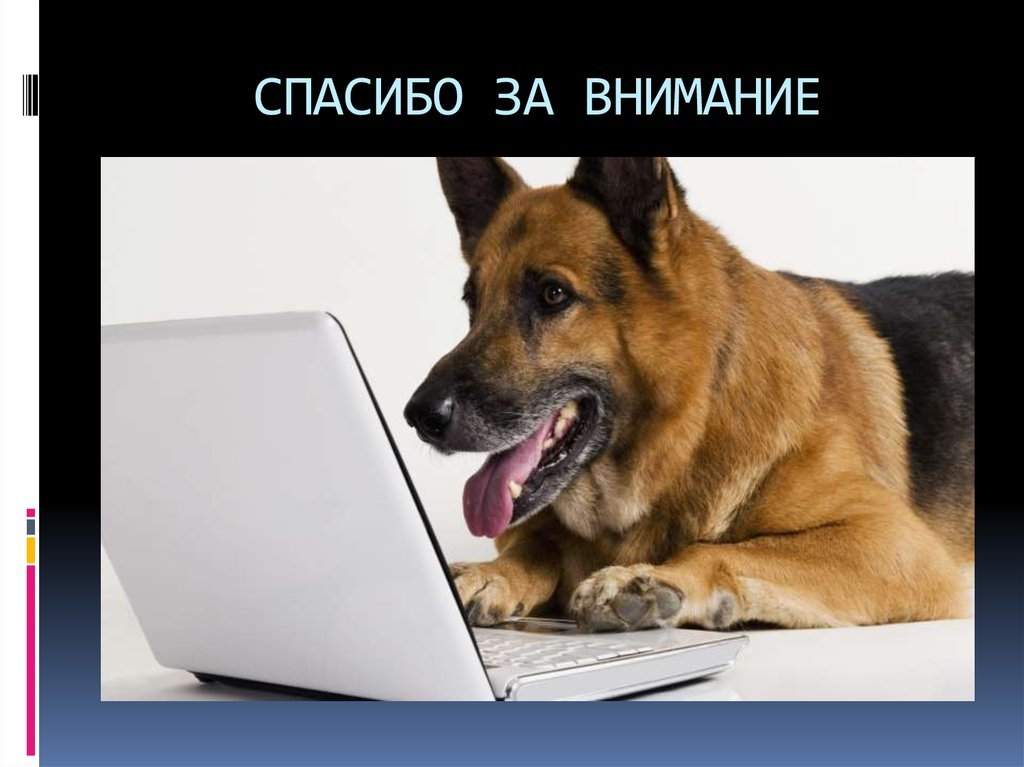

In [68]:
Image('slide-17.jpg')